Importing important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading cleaned file in order explore and analyze

In [2]:
data = pd.read_csv('../Data/clean_data.csv')
data.head()

brand_model       brand   model  mileage      fuel       gear  \
0  Volkswagen Golf  Volkswagen    Golf    92800  Gasoline     Manual   
1   Renault Megane     Renault  Megane    96200  Gasoline     Manual   
2      Peugeot 308     Peugeot     308   156000  Gasoline     Manual   
3     Toyota Auris      Toyota   Auris   147000  Electric  Automatic   
4   Renault Scenic     Renault  Scenic    91894    Diesel     Manual   

  offer_type  price     hp  year  age  
0       Used   6877  122.0  2011   12  
1       Used   6950  110.0  2011   12  
2       Used   6950  156.0  2011   12  
3       Used   6950   99.0  2011   12  
4       Used   6970  131.0  2011   12

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32201 entries, 0 to 32200
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand_model  32201 non-null  object 
 1   brand        32201 non-null  object 
 2   model        32201 non-null  object 
 3   mileage      32201 non-null  int64  
 4   fuel         32201 non-null  object 
 5   gear         32201 non-null  object 
 6   offer_type   32201 non-null  object 
 7   price        32201 non-null  int64  
 8   hp           32201 non-null  float64
 9   year         32201 non-null  int64  
 10  age          32201 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.7+ MB


<AxesSubplot:ylabel='offer_type'>

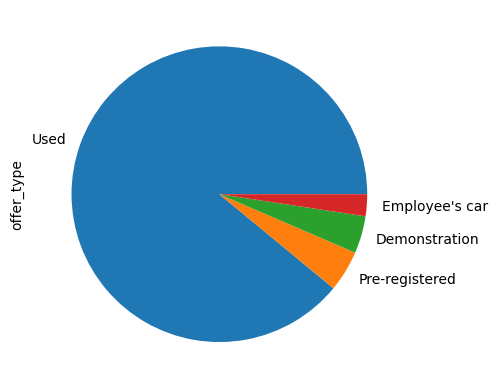

In [4]:
data['offer_type'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='gear'>

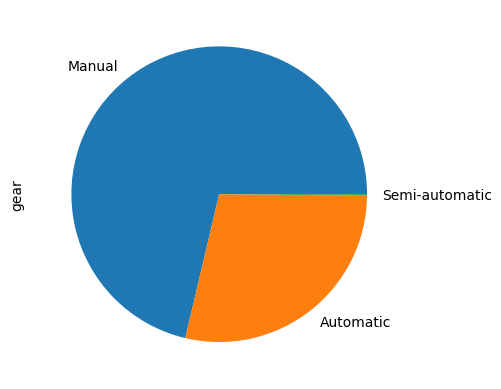

In [5]:
data['gear'].value_counts().plot(kind="pie")

####  Visualizing of Numerical Columns

In [6]:
import warnings
warnings.filterwarnings("ignore")


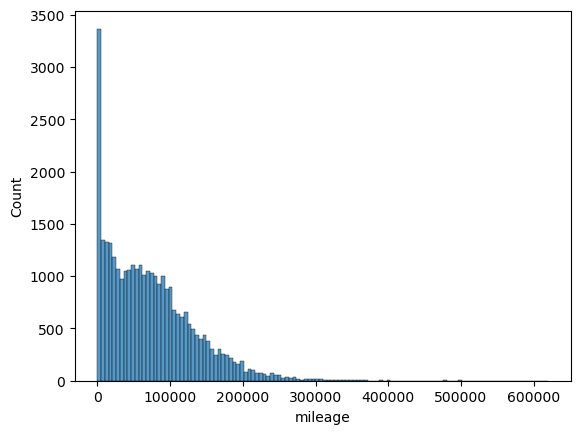

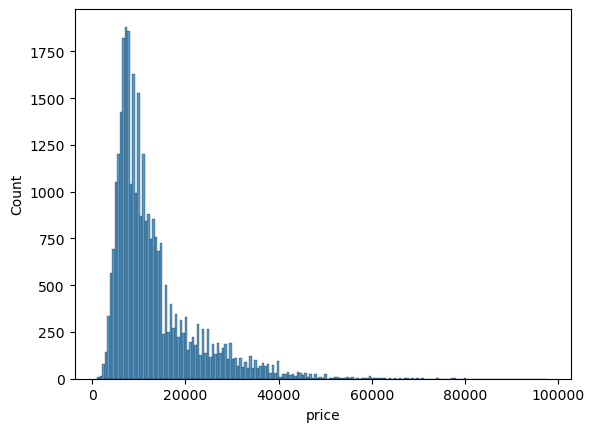

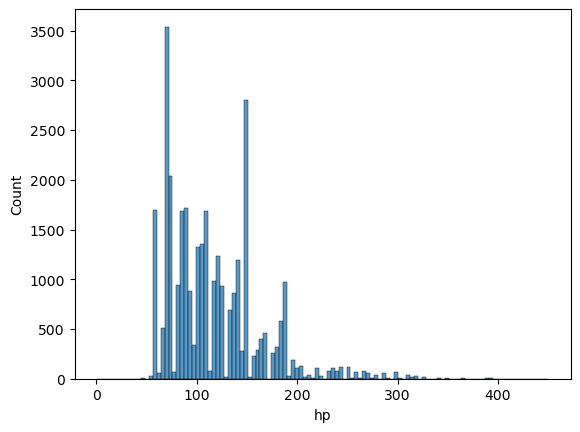

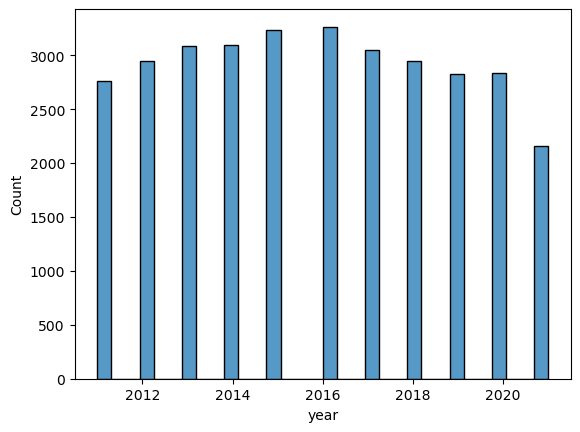

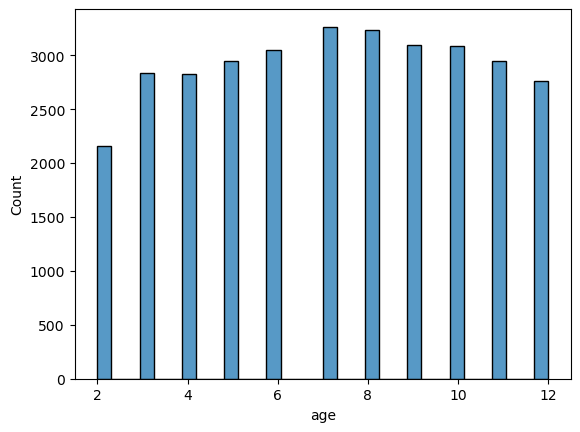

In [7]:
for column in [column for column in data.columns if data[column].dtype== 'int64' or data[column].dtype== 'float64']:
    sns.histplot(data[column],palette='summer')
    plt.show()

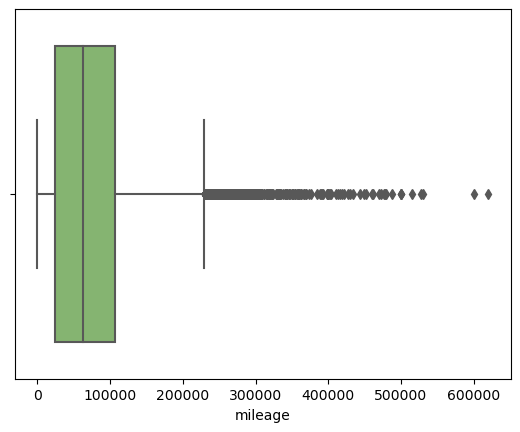

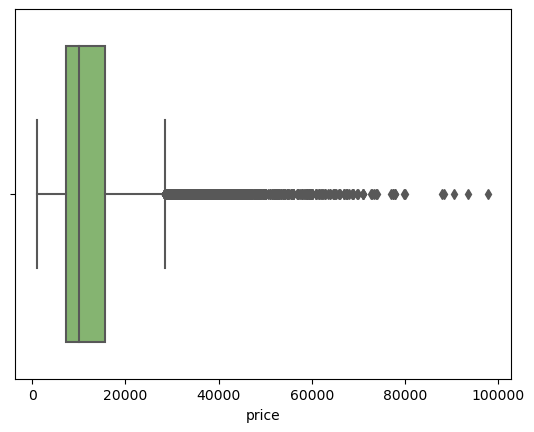

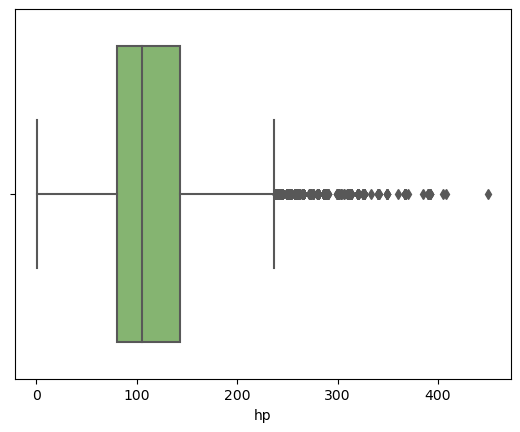

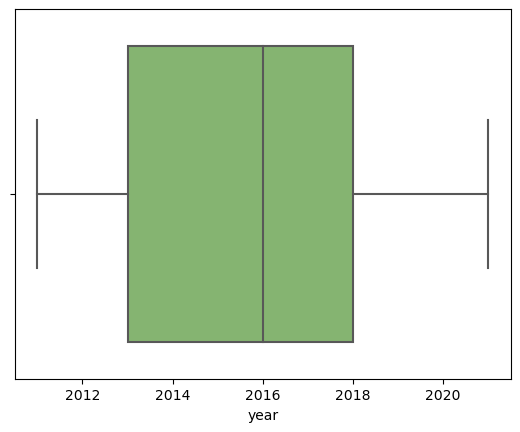

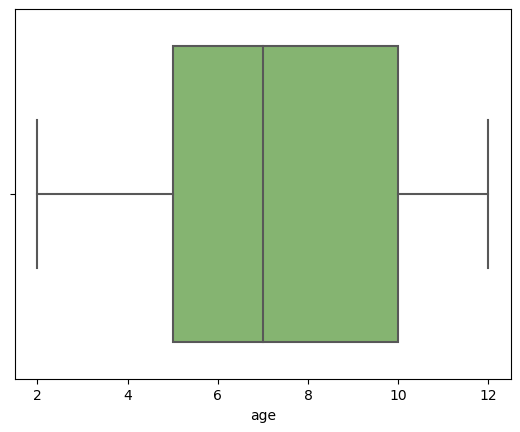

In [8]:
for column in [column for column in data.columns if data[column].dtype== 'int64' or data[column].dtype== 'float64']:
    sns.boxplot(data[column],palette='summer')
    plt.show()

+ Visualizing of Categorical Columns

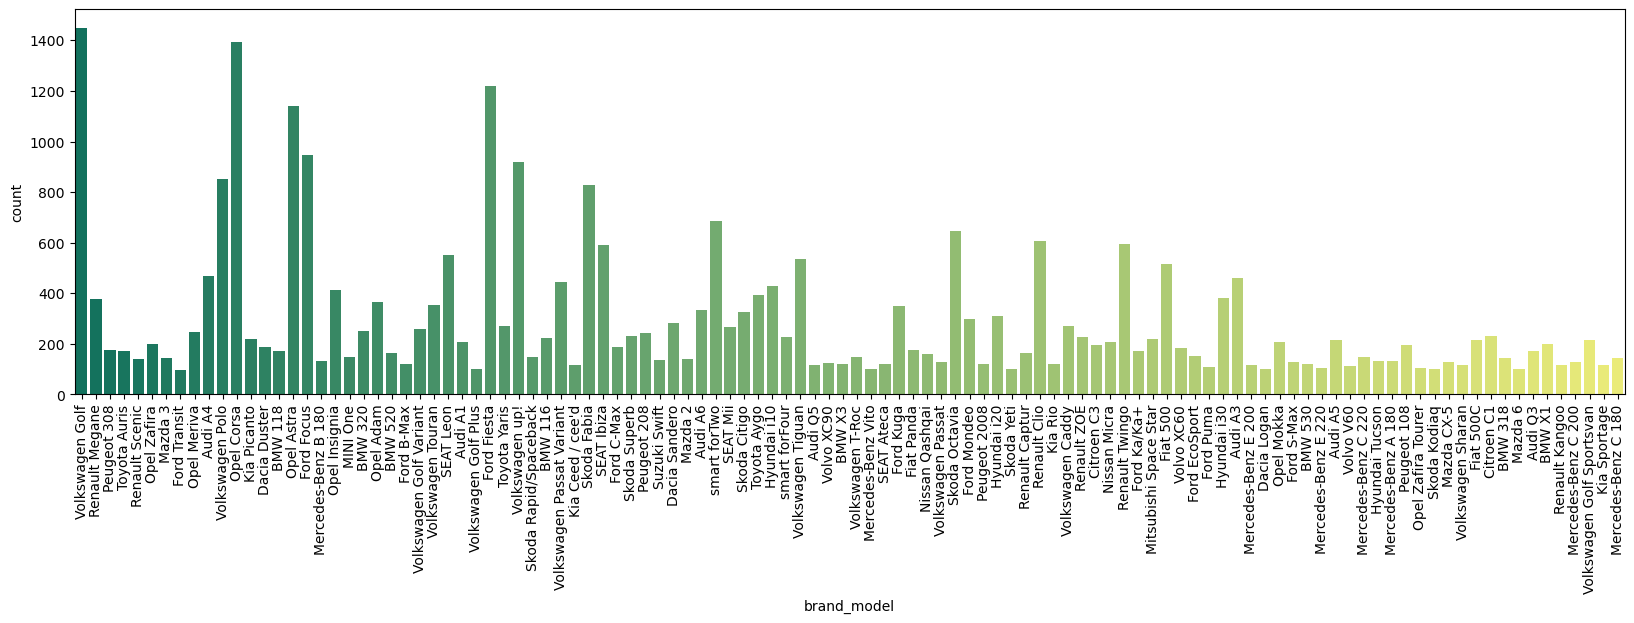

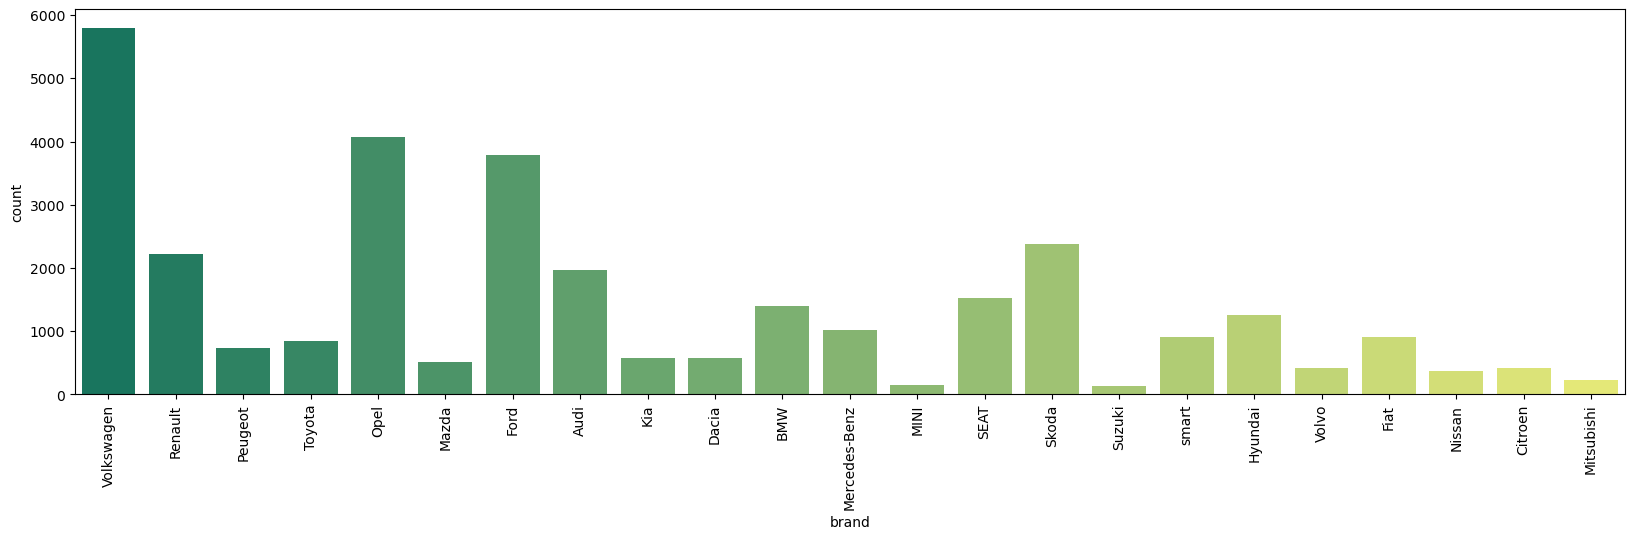

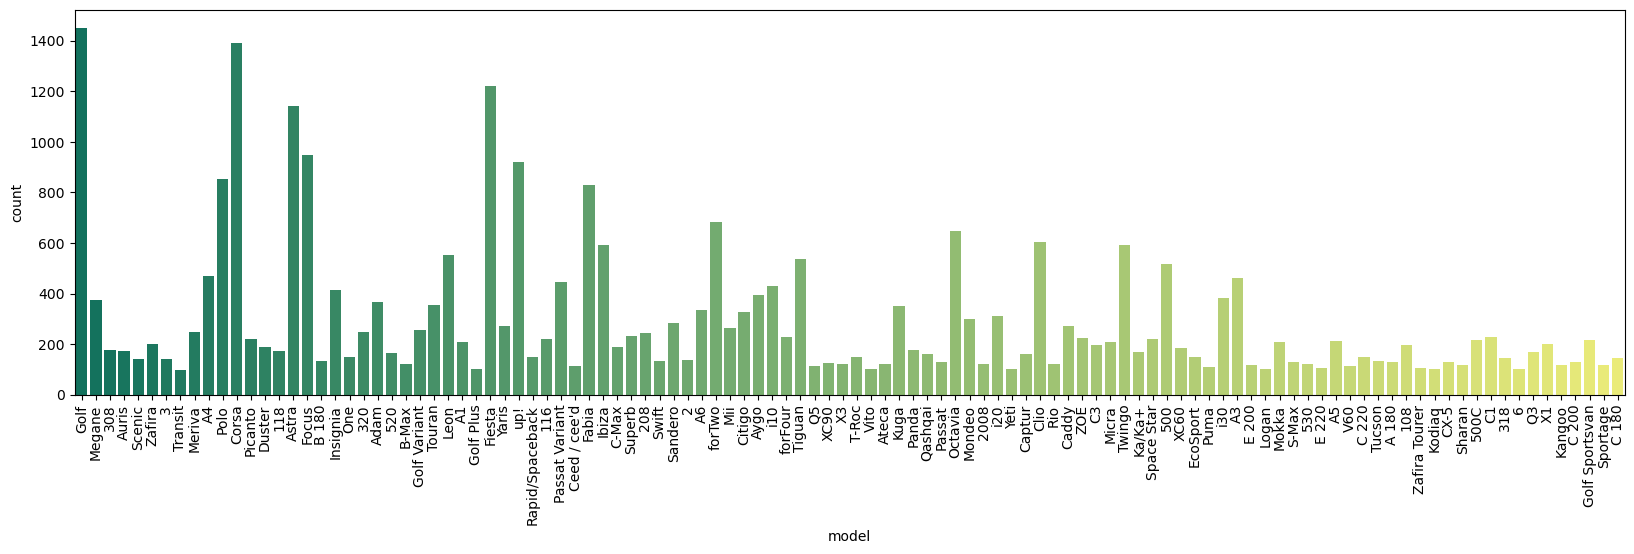

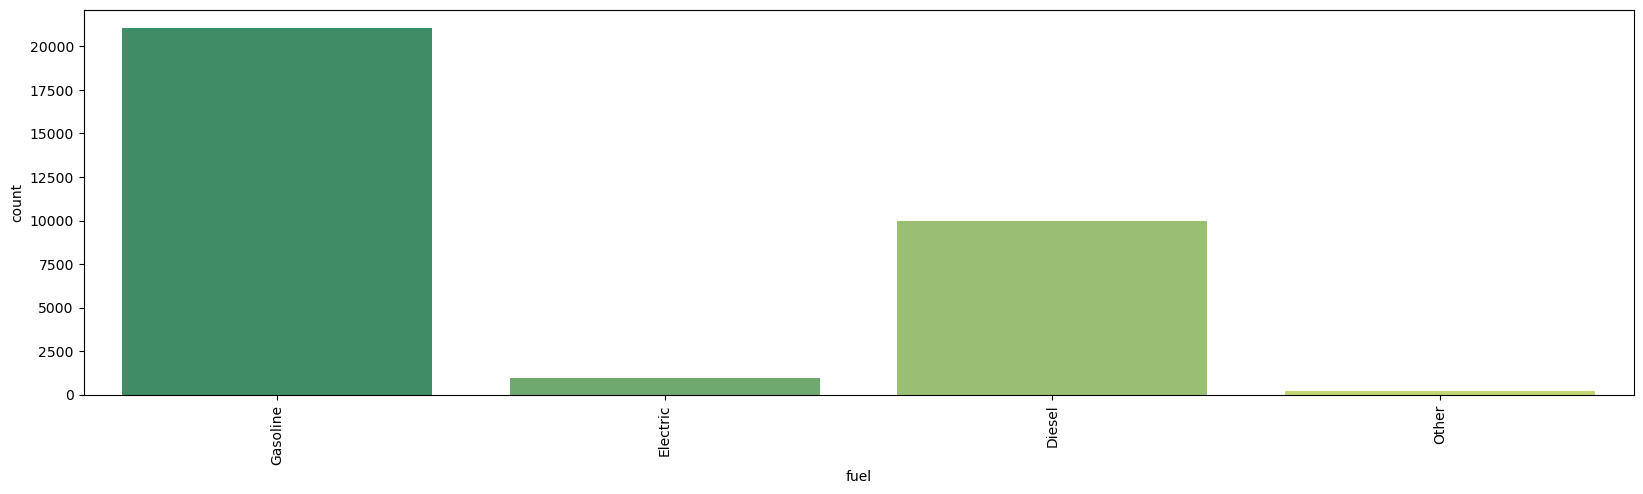

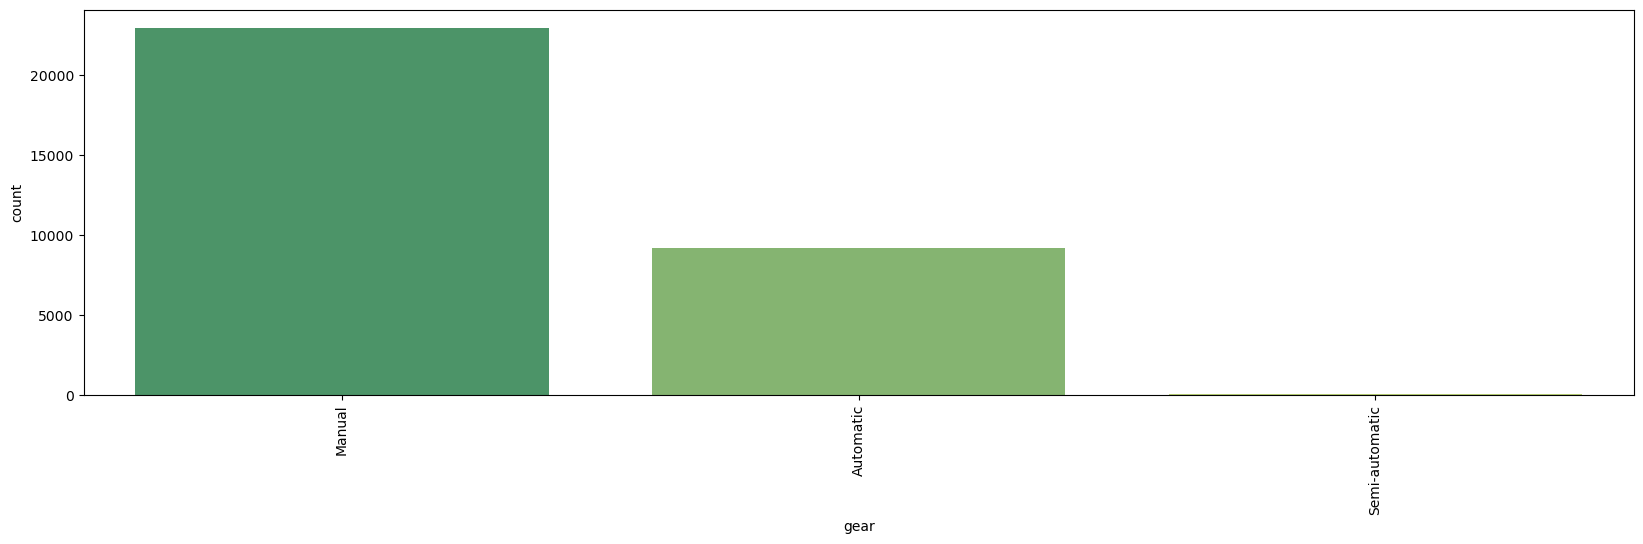

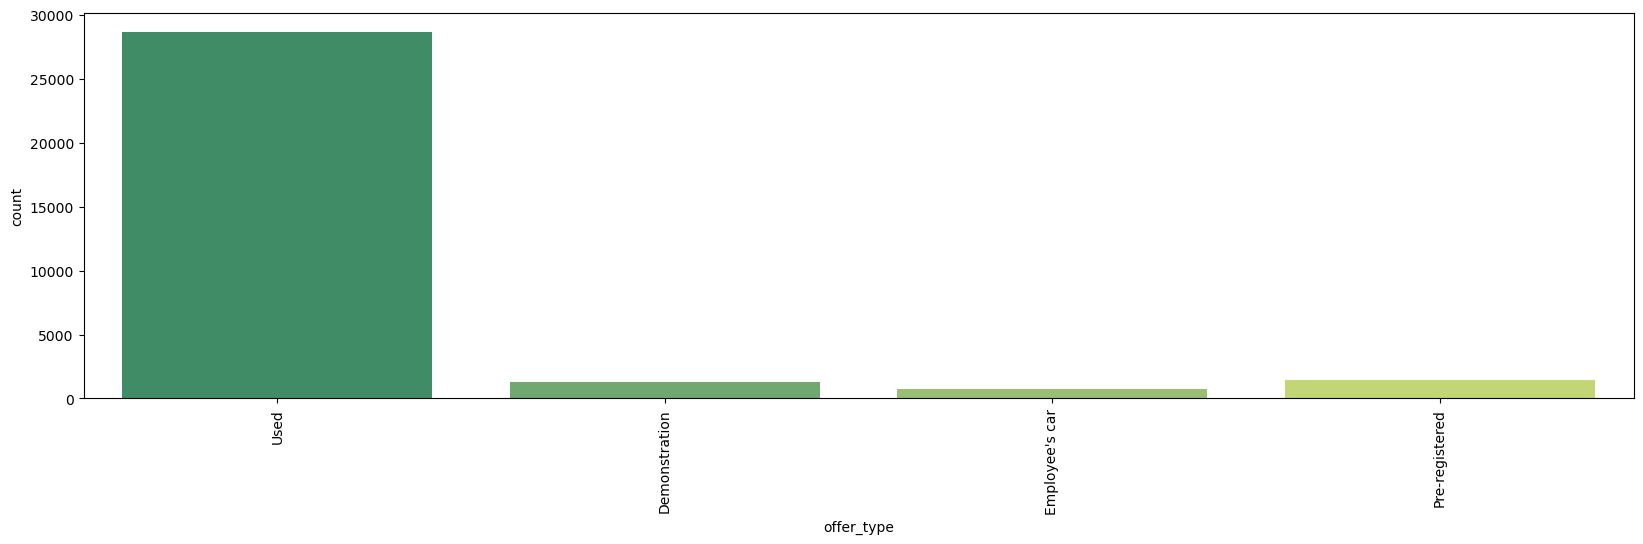

In [9]:
for column in [column for column in data.columns if data[column].dtype== 'object']:
    plt.figure(figsize=(20,5))
    sns.countplot(data[column],palette='summer' )
    plt.xticks(rotation='90')
    plt.show()

Skewed distributions have been observed in some plots.As we recognize outliers from data exploration. We will remove outliers before modelling in the following steps

#### Further Exploration

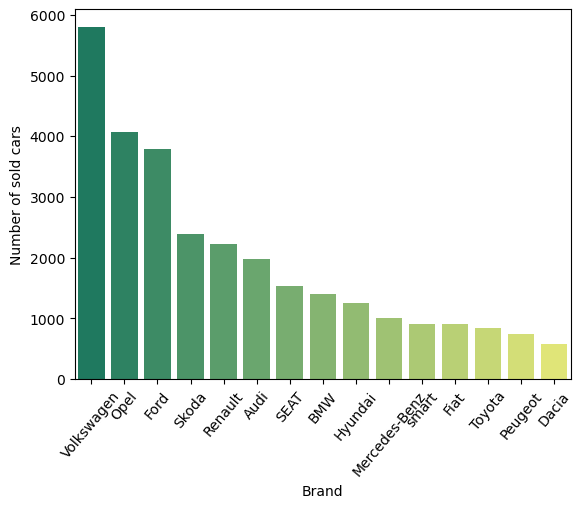

In [10]:
sns.countplot(x= 'brand', data = data, order=data.brand.value_counts().iloc[:15].index,palette='summer');
plt.xticks(rotation=50)
plt.ylabel('Number of sold cars')
plt.xlabel('Brand');
#number of sold cars per brand (first 15)

''

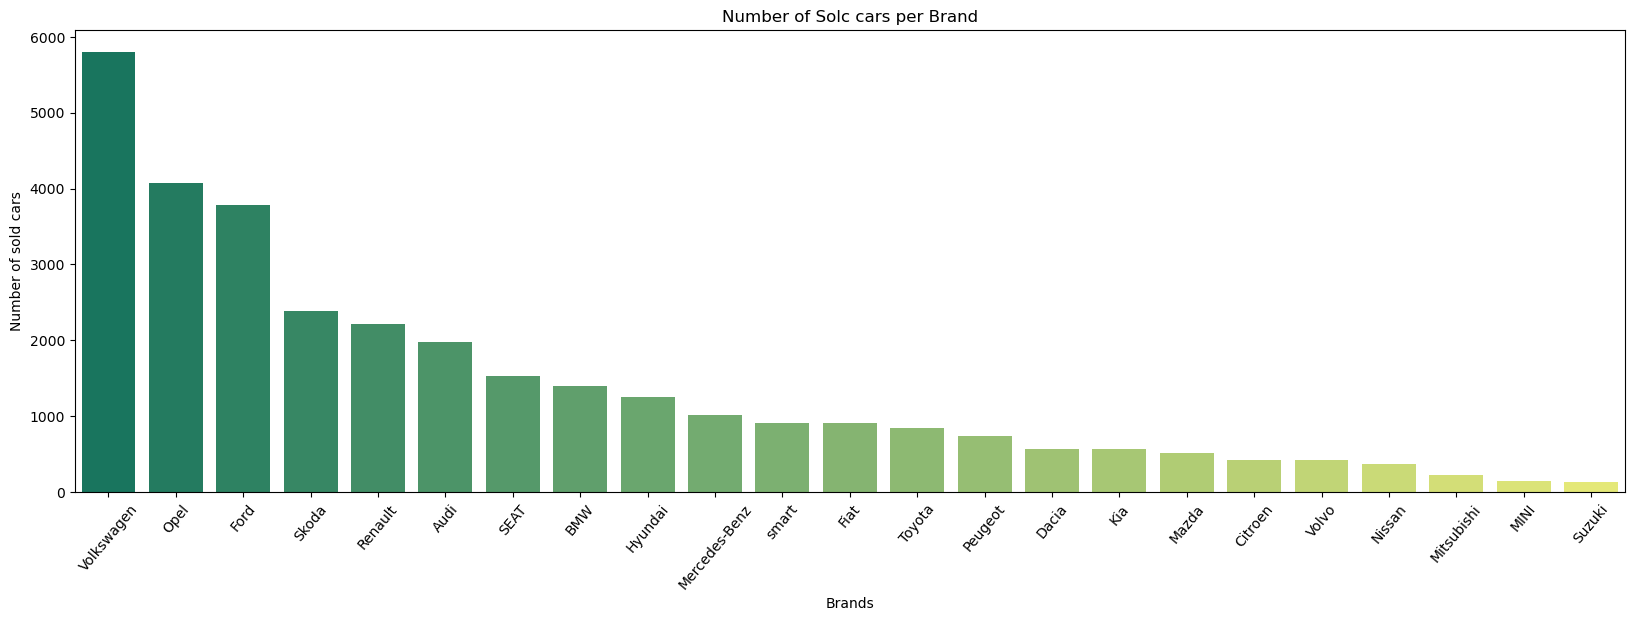

In [11]:
plt.figure(figsize=(20, 6))
sns.countplot(x= 'brand', data = data, order=data.brand.value_counts().index,palette='summer');
plt.xticks(rotation=50)
plt.ylabel('Number of sold cars')
plt.xlabel('Brands')
plt.title("Number of Solc cars per Brand")
;

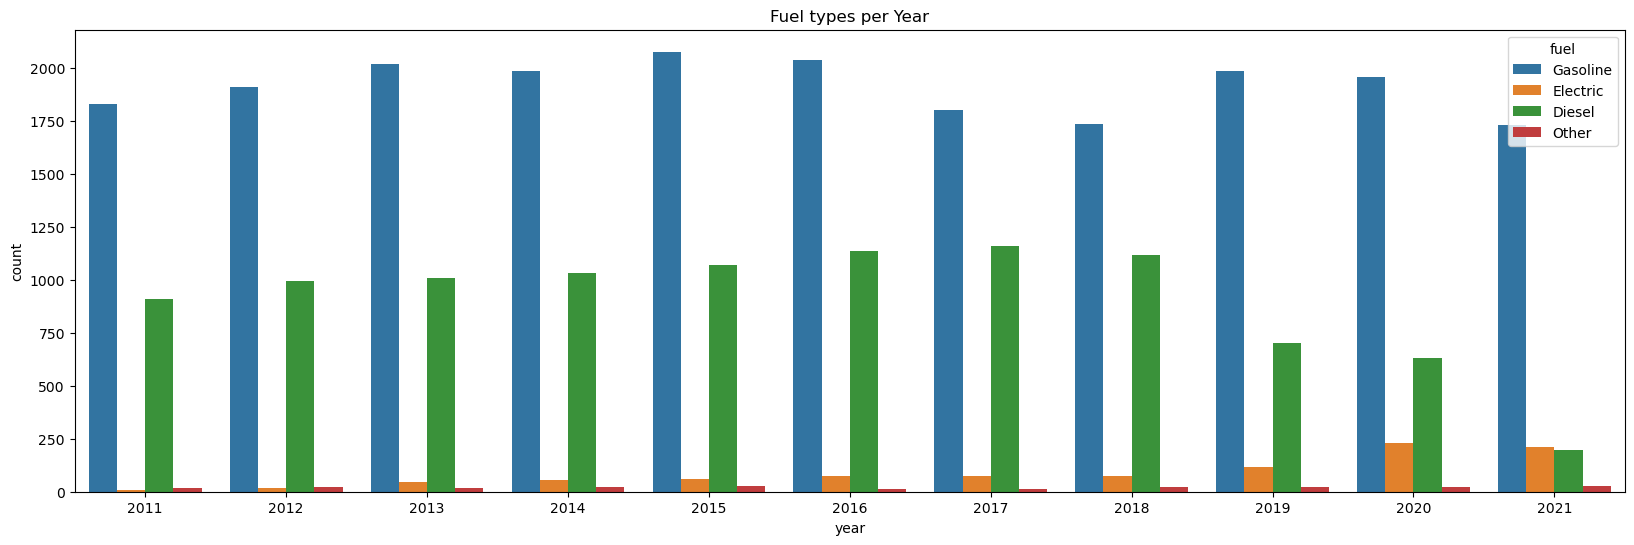

In [12]:
plt.figure(figsize=(20, 6))
sns.countplot(x="year", hue="fuel", data=data) 
plt.title("Fuel types per Year")
plt.show() 

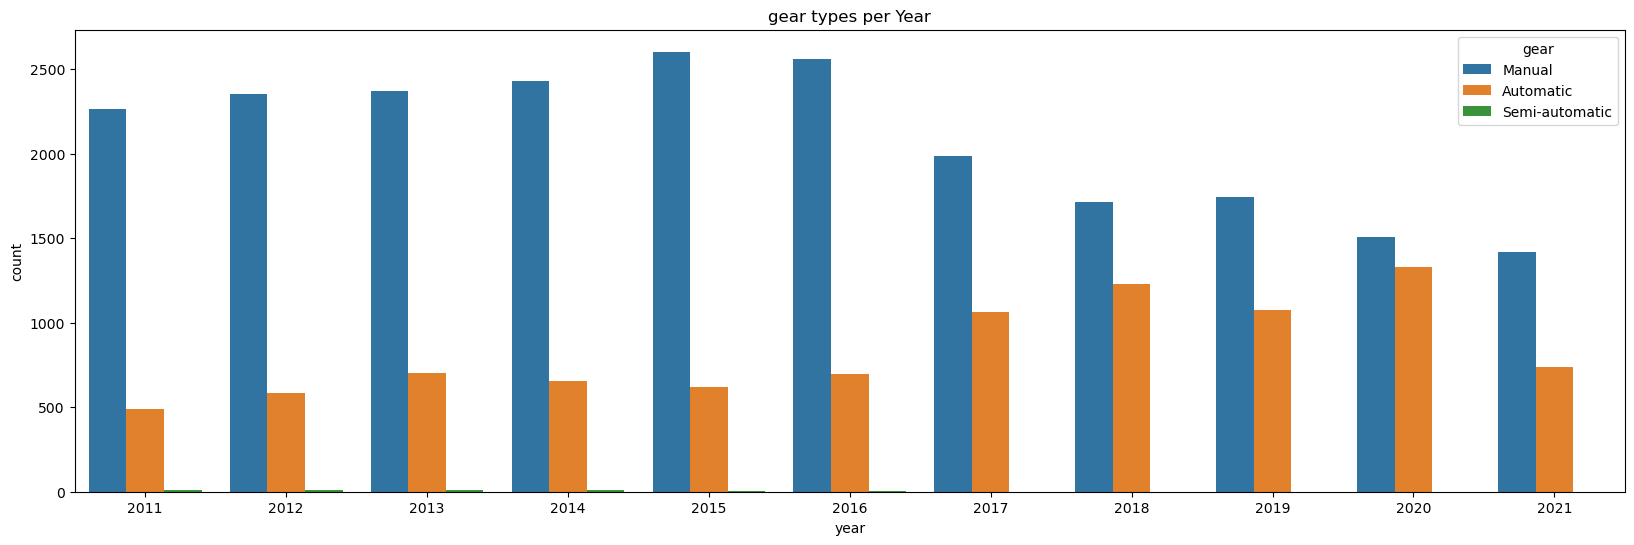

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(x="year", hue="gear", data=data) 
plt.title("gear types per Year")
plt.show() 

### Analysing and Visualizing  columns per price

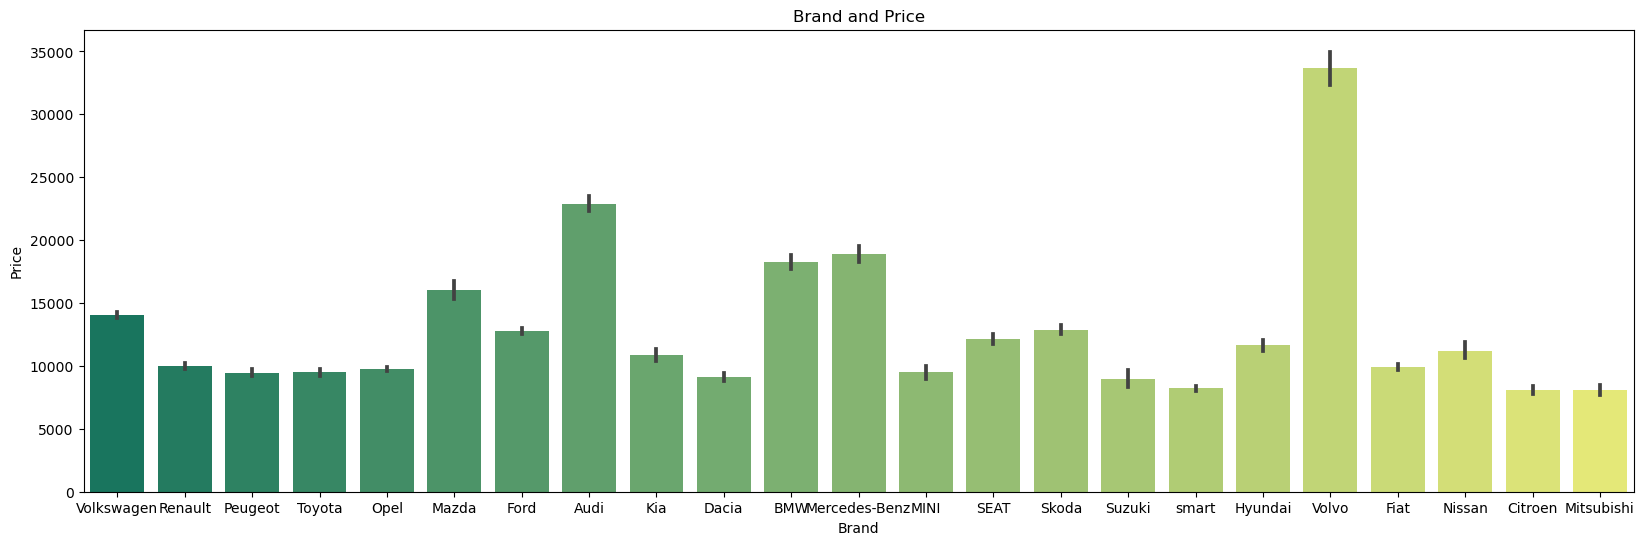

In [14]:
plt.figure(figsize=(20, 6))
sns.barplot(x='brand', y="price", data=data, palette='summer')
plt.title("Brand and Price")
plt.ylabel("Price")
plt.xlabel("Brand")
plt.show()

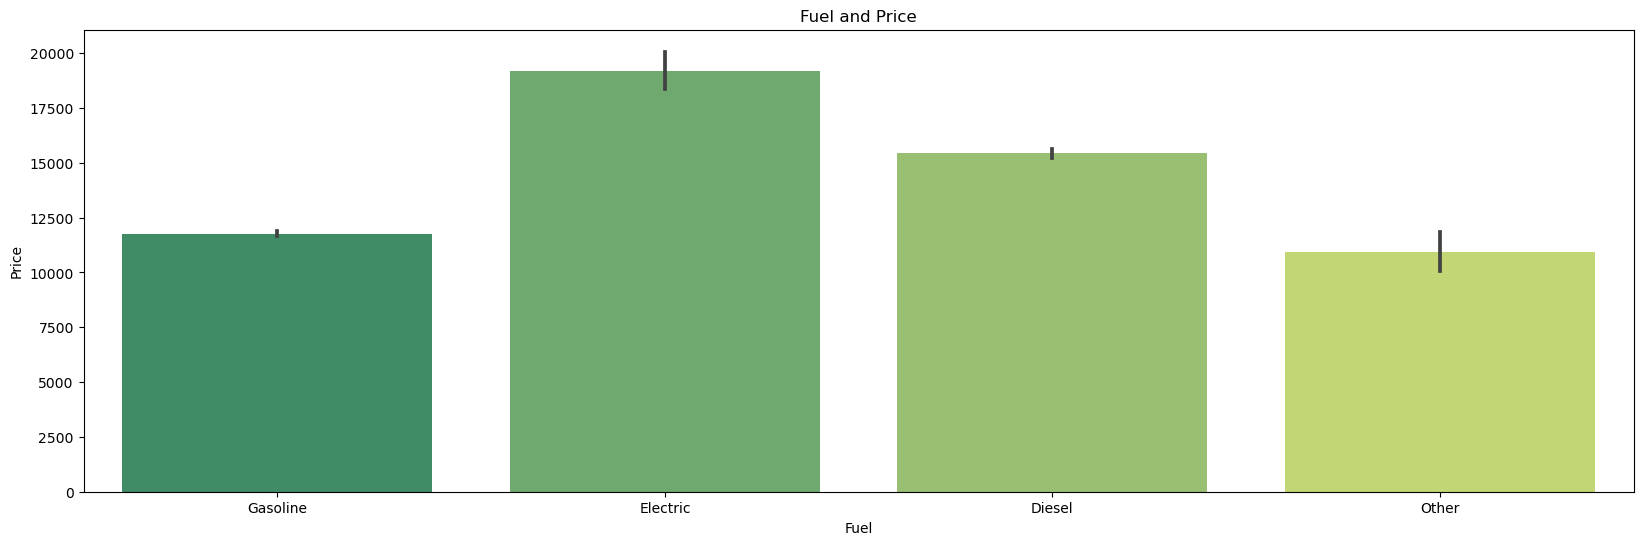

In [15]:
plt.figure(figsize=(20, 6))
sns.barplot(x=data['fuel'], y=data['price'], data=data, palette='summer')
plt.title("Fuel and Price")
plt.ylabel("Price")
plt.xlabel("Fuel")
plt.show()

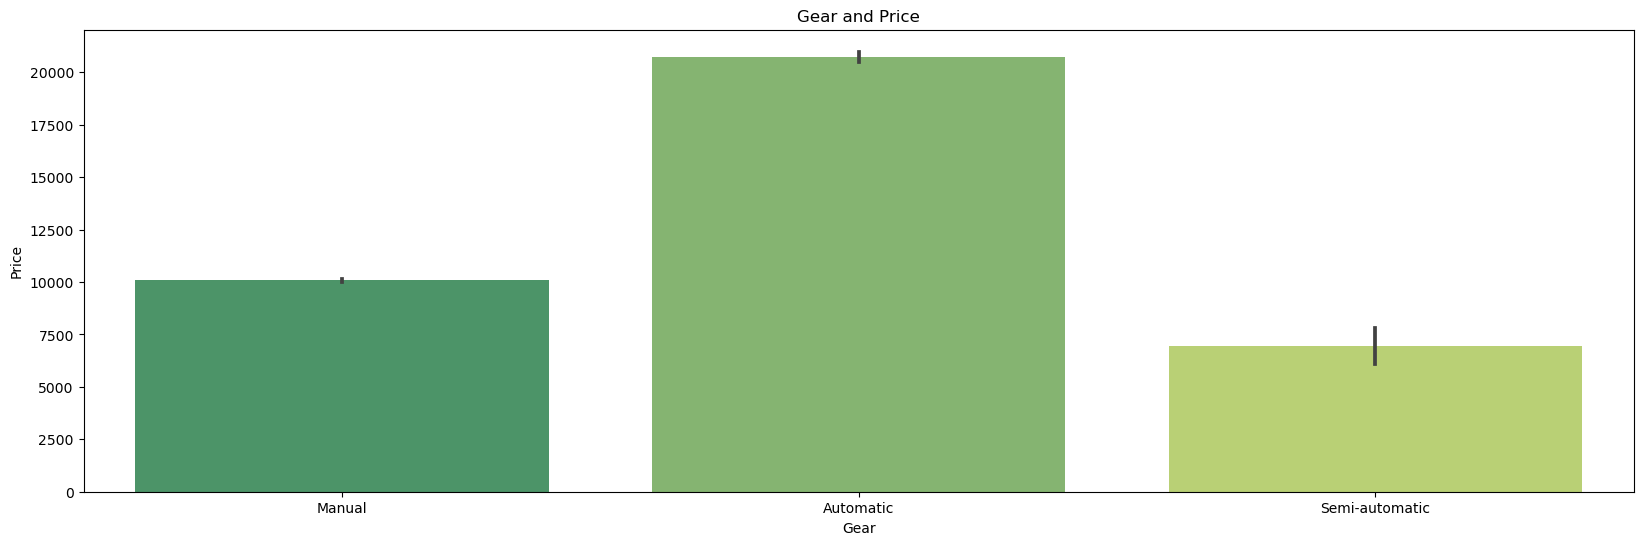

In [16]:
plt.figure(figsize=(20, 6))
sns.barplot(x=data['gear'], y=data['price'], palette='summer')
plt.title("Gear and Price")
plt.ylabel("Price")
plt.xlabel("Gear")
plt.show()

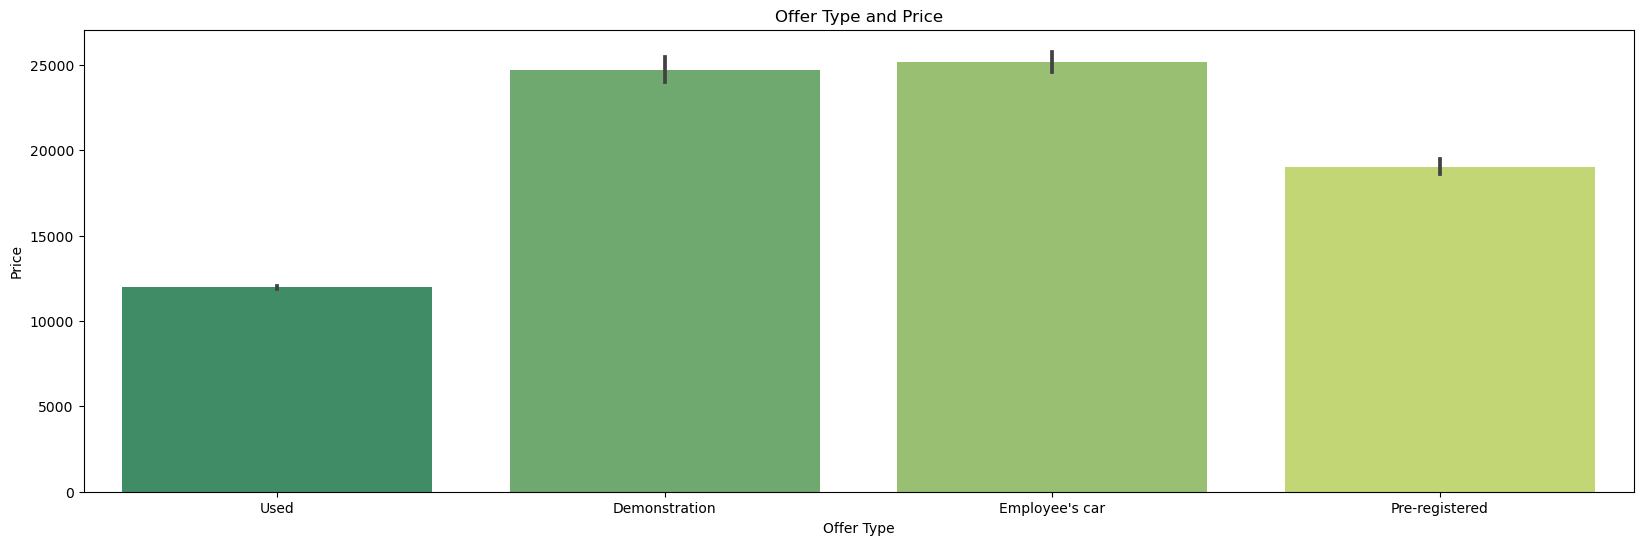

In [17]:
plt.figure(figsize=(20, 6))
sns.barplot(x=data['offer_type'], y=data['price'], palette='summer')
plt.title("Offer Type and Price")
plt.ylabel("Price")
plt.xlabel("Offer Type")
plt.show()

+ Some new cars are registered to dealerships before they’re sold to customers. Known as ‘pre-registered cars’, they often come with significant discounts as a result. They are technically used cars

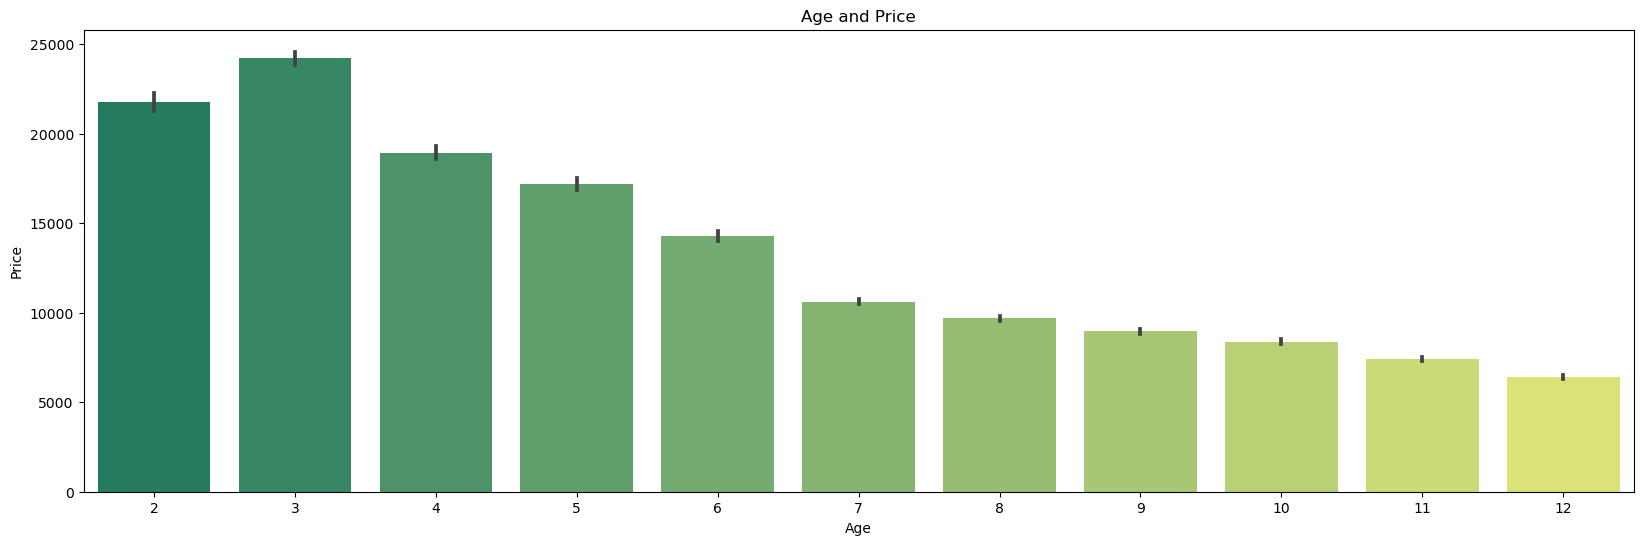

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x=data['age'], y=data['price'],palette='summer')
plt.title("Age and Price")
plt.ylabel("Price")
plt.xlabel("Age")
plt.show()

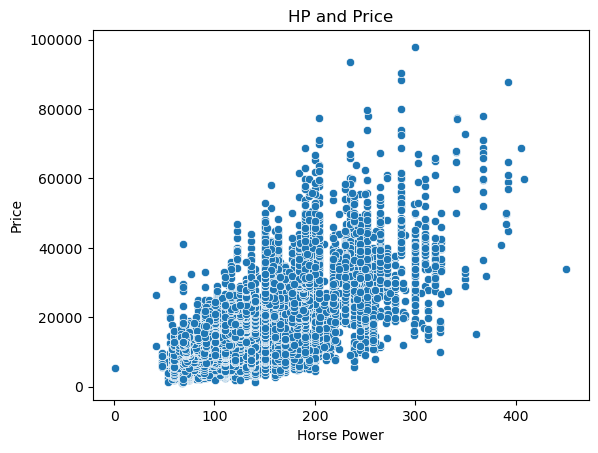

In [19]:
sns.scatterplot(x=data['hp'], y=data['price']) #Positive Correlation
plt.title("HP and Price")
plt.ylabel("Price")
plt.xlabel("Horse Power")
plt.show()


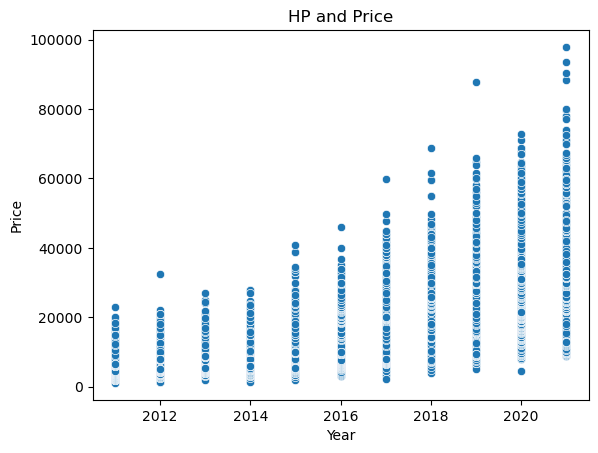

In [20]:
sns.scatterplot(x=data['year'], y=data['price']) #Now Linear Reg Decreasing
plt.title("HP and Price")
plt.ylabel("Price")
plt.xlabel("Year")
plt.show()

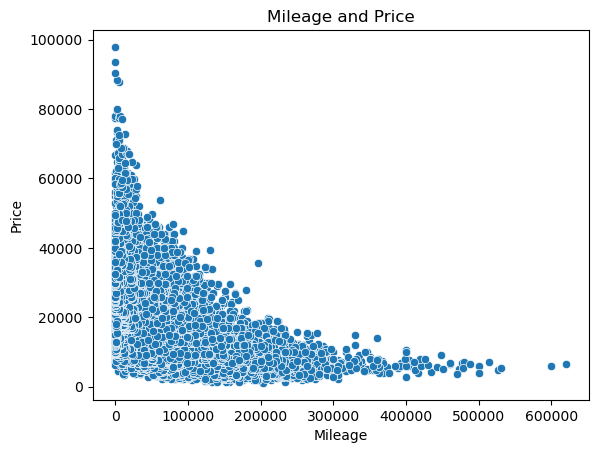

In [21]:
sns.scatterplot(x=data['mileage'], y=data['price']) #Now Linear Reg Decreasing
plt.title("Mileage and Price")
plt.ylabel("Price")
plt.xlabel("Mileage")
plt.show()

Some outliers are observed, we will remove them in the next step